importing the relevant functions to use during the process of building the Multilayered Artificial Neural Network.
Functions imported are used for mathematical operations, loading of data, data preprocessing, and finally plotting.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
import os
from math import log

Functions for data loading, and preprocessing including data splitting and standardization.

In [2]:
def input_data(filename):
    """
    This function is used in loading the data as dataframes using pandas.
    Args:
        filename (str): A string which represents the name of the file to be loaded.
    Returns:
        A dataframe which  represents the dataframe returned after loading the data.
    """
    # set header as None to avoid setting relevant columns as headers.
    loaded_data = pd.read_csv(filename, header = None)
    
    return loaded_data

def get_label_features(data_frame, label_index):
    """
    This function returns the label and feature of the dataset 
    Args:
        data_frame - A dataframe obtained after loading the data using pandas.
        label_index - The index which represents the position of the label
    Returns:
        X, Y (two dataframes) which represents the Features as well as the Labels.
    """
    Y = data_frame[label_index]
    X = data_frame.drop([label_index], axis = 1)
    return X, Y
    
def convert_to_numpy(pd_value):
    """
    This function converts the panda data into a numpy array.
    Args: 
        pd_value - A dataframe value to be converted to an numpy array
    Returns:
        A numpy array.
    """
    return np.array(pd_value)


def encode_label(encoder, label):
    """
    This function encodes a label with categorical values into numerical values
    Args:
        encoder - This represents the encoder function to be used.
        label - This represents the categorical dataframe to encode.
    
    Returns:
        An encoded value with numerical values arranged in ascending order.
    """
    return encoder.fit_transform(label)


def expand_classes(label, num_classes):
    """
    This function breaks a label into mutiple columns that represents the number of classes contained in the function.
    Args:
        label(numpy): A numpy array that represents the label
        num_classes(int): An integer that represents the nmumber of classes.
    """
    # create an identity matrix with num_classes rows and columns
    get_identity = np.eye(num_classes)
    
    return (get_identity)[label]
    
def standardize_features(scaler, features):
    """
    This function helps to standardize a feature within a given range to reduce variance.
    Args:
        scaler - This represents the scaler to be applied to the dataset
        features (numpy) -  numpy array that represents the data to apply the scaler to.
    
    """
    return scaler.transform(features)

def get_shape(value):
    """
    This function gets the shape of the value
    Args: 
        value: A numpy array or a dataframe whose shape we want to get.
    Returns:
        returns a tuple which represents the shape of the value
    """
    
    return value.shape

functions for activation functions and its derivatives

In [3]:
def compute_activ_func(activ_func, A):
    """
    This function helps to anipulate an Array using it's activation function
    Args:
        activ_func (str) - A string which represents the activation function
        A(numpy) - A numpy array which represents the array we wish to apply the activation function equation to
    
    Returns:
        None if Activation function is invalid or a numpy array that represents the computed value. 
    source: https://www.v7labs.com/blog/neural-networks-activation-functions
    """
    
    ## if the activation functin is sigmoid
    if activ_func.lower() == "sigmoid":
        return 1 / (1 + np.exp(-A))
    # if the activation function is relu
    elif activ_func.lower() == "relu":
        return np.maximum(0, A)
    # if the activation function is tanh
    elif activ_func.lower() == "tanh":
        return np.tanh(A)
    else:
        return None
    

def compute_derivat(activ_func, A):
    """
    This function computes the derivative of a numpy array based on it's activation function
    Args:
        activ_func (str) - A string which represents the activation function
        A(numpy) - A numpy array which represents the array we wish to apply the activation function equation to
    Returns:
        None if Activation function is invalid or a numpy array that represents the computed value. 
    source: https://yashgarg1232.medium.com/derivative-of-neural-activation-function-64e9e825b67
    """
    # if the activatin function is sigmoid
    if activ_func.lower() == "sigmoid":
        Z = compute_activ_func(activ_func, A)
        return np.multiply(Z, 1 - Z)
    # if the activation is relu
    elif activ_func.lower() == "relu":
        return np.where(A <= 0, 0, 1)
    # if the activation function is tanh
    elif activ_func.lower() == "tanh":
        Z = compute_activ_func(activ_func, A)
        return 1 - np.square(Z)
    else:
        return None

functions for cost functions and optimization algorithms

In [4]:
def cost_function(cost_fn, y_true, y_pred) -> float:
    """
    This function computes the cost function of the model.
    Args:
        cost_fn(str) - A string whch represents the cost function type
        Y_true(numpy) - A numpy array which represents the actual ouput
        Y_pred(numpy) - A numpy array which represents the predicted output.
    
    Returns:
        A float which represents the cost.
    """
    size = get_shape(y_true)[1]
    
    # if the cost function is binary_cross_entropy
    if cost_fn.lower() == "binary_cross_entropy":
        logprobs = (np.multiply(y_true, np.log(y_pred)) + np.multiply((1-y_true),np.log(1-y_pred))) / size
        cost = -np.sum(logprobs)
        return float(np.squeeze(cost)) 
    elif cost_fn.lower() == "mse":
        get_loss = np.square(y_true - y_pred) / size
        return np.sum(get_loss)
    else:
        return None

functions for plotting the class distribution, as well as model outputs

In [27]:
def get_accuracy_score(pred, actual):
    """
    This function computes the accuracy score of the model
    Args: 
        pred - represents the predicted value
        actual- represents the actual values
    Returns:
        A float which represents the score.
    """
    sample_size = actual.shape[1]
    Tp = np.dot(pred, actual.T)[0][0]
    Tn = np.dot(1 - pred, 1 - actual.T)[0][0]
    
    accuracy = float(Tp + Tn) / float(sample_size)
    
    return accuracy

def confusion_matrix(pred, Y):
    return np.dot(pred, Y.T)

def confuse_plot(data, title):
    """
    This function displays the confusion matrix of the prediction derived from the model.
    Args:
        data(numpy) - An array which represents the computed confusion matrix
        title(string) - A vlaue which represent the title of the plot.
    """
    plt.figure(figsize = (10,8))
    # were 'cmap' is used to set the accent colour
    sns.heatmap(data, annot=True, cmap= 'flare',  fmt='d', cbar=True)
    plt.xlabel('Predicted_Label')
    plt.ylabel('Truth_Label')
    plt.title(title)
    plt.show()

function for building the multilayered neural network

In [6]:
def get_layer_size(N):
    """
    This function returns the number of layers in the network 
    """
    return len(N)


def get_nodes(value):
    """
    This function returns the number of nodes in a given array.
    Args:
        value(array): 2 dimensional array which represents the layer which we want to get it's node.
    Returns:
        An integer which represents the nodes
    """  
    return value.shape

def multilayer_parameters_initialize(dimension) -> dict:
    """
    Args:
        dimension (list) -> Represent a list which contains the nodes for each layer 
    Returns:
        A dictionary which represents the parameters of the model.               
    """
    
    # for reproducible of weights, we set a seed.
    np.random.seed(50)
    params = {}
    
    # get the number of layers in the layer.
    N = len(dimension)
    
    #  the least we expect is a 2 Layered Neural network.
    if N < 3:
        return None

    for layer in range(1, N):
        params['W' + str(layer)] = np.random.randn(dimension[layer], dimension[layer-1]) * 0.01
        params['b' + str(layer)] = np.zeros((dimension[layer], 1))
        
    return params


def compute_forward_prop(X, params, activ_fns, layer_size) -> dict:
    """
    This function computes the forward propagation of the model with initialized or updated set of parameters and 
    activation function.

    Args:
        X(numpy): An array which represents the input value to the layer
        params(dict) - A dictionary that represents the parameter of the models
        activ_fn(list): A list of string which represents the activation function.
    Returns:
        A dictionary represents the output of the model as well as the activation function passed.
    """
    cache = {}
    for i in range(1, layer_size):
        # store the weights and bias
        W = params["W"+str(i)]
        b = params["b"+str(i)]
        activ_fn = activ_fns[i - 1]
        # Here we'd use the activation
        if i == 1:
            cache["act" + str(i)] = activ_fn
            cache["Z" + str(i)] = np.dot(W, X) + b
            cache["A" + str(i)] = compute_activ_func(activ_fn, cache["Z" + str(i)])
        else:
            cache["act" + str(i)] = activ_fn
            cache["Z" + str(i)] = np.dot(W, cache["A" + str(i-1)]) + b
            cache["A" + str(i)] = compute_activ_func(activ_fn, cache["Z" + str(i)])
                
    return cache

def compute_backward_prop(cache, layer_size, Y, params, X) -> dict:
    """
    This function computes the gradient of the model which would be used later to update the parameters of the model.
    Args:
        dA (Array): An array which would be feed into the function at first.
        cache(dict): A dictionary containing outputs from forward propagation
        layer_size(int): An integer that represents the size of the layer used in the model.
        Y(array): An array which represents the actual output of the model.
        params (dict) - A dictionary which represents the weight and bias of the model
    
    Returns:
        A dictionary which stores the gradients
    """
    # don't count the input layer.
    layer = layer_size - 1
    # get the number or records
    size = Y.shape[1]
    # initialize an empty dictionary to hold the gradients.
    grad = {}
    dA = cache["A" + str(layer)] - Y
    # dW2 = W
    grad["dW" + str(layer)] = (np.dot(dA, cache["A" + str(layer - 1)].T)) / size
    grad["db" + str(layer)] = np.sum(dA, keepdims = True, axis = 1) / size
    
    # apply derivative for each activation function accross each layers going backward.
    for i in range(layer - 1, 1, -1):
        # get the weight, activaton function, 
        act = cache["act" + str(i)]
        W = params["W" + str(i+1)]
        dX = np.dot(W.T, dA)
        # compute the derivative for the activation function.
        dA = np.multiply(dX, compute_derivat(act, cache["A" + str(i)]))
        grad["dW" + str(i)] = (np.dot(dA, cache["A" + str(i - 1)].T)) / size
        grad["db" + str(i)] = np.sum(dA, keepdims = True, axis = 1) / size
    
    # f
    act = cache["act" + str(1)]
    W = params["W2"]
    dX = np.dot(W.T, dA)
    dA = np.multiply(dX, compute_derivat(act, cache["A1"]))
    grad["dW1"] = (np.dot(dA, X.T)) / size
    grad["db1"] = np.sum(dA, keepdims = True, axis = 1) / size
    
    return grad


def reset_params(params, grads, learning_rate, layer_size):
    """
    This function update parameters using the gradient descent algorithm
    
    Args:
        params (dict) - A dict which represents the initial parameters 
        grads (dict) - A dict which represents the gradients from the backward propagation.
        layer_size(int): An integer that represents the size of the layer.
        learning_rate(float): A float which represents the value use in update the weight and bias.
    
    Returns:
        A dict which represents the updated parameter.
    """
    parameters = params.copy()
    N = layer_size

    for l in range(N-1):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW"+str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db"+str(l+1)]
    
    return parameters

In [7]:
def Build_Multi_ANN(X, Y, activation_functions, ann_size, cost_fn, ann_layer, learning_rate, Epochs):
    """
    This function builds the Multi-layer ANN, to get a better value of weight and bias to use.
    Args:
        X(Array) - This represents the input to the model
        Y(array) - This represents the actual output.
        activation_functions (list) - This represents the set of activation function used.
        ann_size (int) - This represents the size of the ANN layer
        cost_fn(str) - This represents the cost function to compute the loss
        ann_layer(list) - This represents the layers with their nodes.
        learning_rate(float): represents how fast we want the model to descent
        Epochs (int): Representts the number of times we want to train the model.
    
    Returns:
        Two values representing the losses and the updated parameter
        
    """
    cost = []
    # first initialize the parameters.
    parameters = multilayer_parameters_initialize(ann_layer)
    for i in range(Epochs):
        # perform forward propagation to get the output from each layers, and also a final output
        forward_cache = compute_forward_prop(X, parameters, activation_functions, ann_size)
        # extract the fina output as it would be used in computing the cost.
        final_output = forward_cache["A"+str(ann_size -1)]
        # compute the cost
        get_cost = cost_function(cost_fn, Y, final_output)
        # perform backward propagation to get gradient that would be used in updating the parameters to minimize errors.
        get_grad = compute_backward_prop(forward_cache, ann_size, Y, parameters, X)
        # update the parameters with the computed gradients and learning rate.
        parameters = reset_params(parameters, get_grad, learning_rate, ann_size)
        
        if i % 500 == 0:
            print(f'cost after {i} epochs is {get_cost}')
#             cost.append[get_cost]
            
    return cost, parameters

def model_prediction(X, params, act_fns, ann_size):
    """
    This function performs the model prediction
    Args:
        X represents the input
        params represents the ann updated parameters
        act_fns represents all activations used
        ann_size represents the size
    Returns:
        An array which represents the predicted output
    """
    get_cache = compute_forward_prop(X, params, act_fns, ann_size)
    predicted_output = get_cache["A" + str(ann_size - 1)]
    predict = (predicted_output > 0.5)
    
    return predict

    

In [8]:
# get the working directory of the system.
current_dir = os.getcwd()
DATASET = "wdbc.data"
# combine the dataset with the file path.
set_file = os.path.join(current_dir, DATASET)
# load the dataset.
load_data = input_data(set_file)
# show the data
display(load_data)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
print(f'The shape of the data after loading it is {get_shape(load_data)}')
# The first column is not relevant, and might result to poor generalization of the model
# according to the data description, it refers to the image id. Hence drop it.
new_data = load_data.drop([0], axis = 1)
print(f'The shape of the data after dropping the first column is {get_shape(new_data)}')
display(new_data)

The shape of the data after loading it is (569, 32)
The shape of the data after dropping the first column is (569, 31)


,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
# get the input and labels
# The label represents the column with categorical values M and B i.e column 1.
feature, label = get_label_features(new_data, 1)
print("Showing the features")
print()
display(feature)
print()
print("Showing the labels")
print()
display(label)
print()
print(f'Shape for feature is {get_shape(feature)} and Shape for label is {get_shape(label)}')
print()


Showing the features



,2,3,4,5,6,7,8,9,10,11,...,22,23,24,25,26,27,28,29,30,31
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400



Showing the labels



0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: 1, Length: 569, dtype: object


Shape for feature is (569, 30) and Shape for label is (569,)



In [11]:
# define the number of classes in the label, since we have 
NUM_CLASSES = 2
# convert to numpy arrays.
converted_features = convert_to_numpy(feature)
converted_labels = convert_to_numpy(label)

# encode the labels using LabelEncoder
label_encoder = LabelEncoder()
new_label = encode_label(label_encoder, converted_labels)
print(f'label after conversion is\n\n {new_label}')
print()
print(f'Shape after encoding the data is {get_shape(new_label)}')
print()
# breaking the label to allow each class occupy a distinct column
new_label = expand_classes(new_label, NUM_CLASSES)
print(f'Shape after expanding the data is {get_shape(new_label)}')
print()
print(f'label after expanding is\n\n {new_label}')
print()
print("1 represents Malignant and 0 represents Benigh")


label after conversion is

 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1

In [12]:
#standardize the dataset, precisely the features.
scaler = StandardScaler().fit(feature)
standardize_feature = standardize_features(scaler, feature)


In [13]:
# transpose both the input and outputs
new_input = standardize_feature.T
new_output = new_label.T

print(f'Shape of label after transposing the data is {get_shape(new_output)}')
print()
print(f'Shape of input after transposing the data is {get_shape(new_input)}')


Shape of label after transposing the data is (2, 569)

Shape of input after transposing the data is (30, 569)


In [14]:
X_nodes, Y_nodes = get_nodes(new_input)[0], get_nodes(new_output)[0]


In [15]:
# defining the neural network where first value represents number of nodes in input layer
# last value represents number of nodes in output layer
# values in between represent number of nodes in the hidden layer(s)

# Setting the hyper parameters.
ANN_LAYER = [X_nodes, 10, Y_nodes]
ANN_SIZE = get_layer_size(ANN_LAYER)
# please activation functions should be 1 size less than the ANN_LAYER
ACTIVATION_FUNCTION = ["relu", "sigmoid"]
LEARNING_RATE = 0.001
EPOCHS = 30000

COST_FUNCTION = "binary_cross_entropy"

print(f'A {ANN_SIZE - 1} layer ANN with 1 output and {ANN_SIZE - 2} Hidden Layers')

A 2 layer ANN with 1 output and 1 Hidden Layers


START THE BUILDING

In [16]:

costs, ann_parameters = Build_Multi_ANN(new_input, new_output, ACTIVATION_FUNCTION, 
                                       ANN_SIZE, COST_FUNCTION, ANN_LAYER, LEARNING_RATE, EPOCHS)

cost after 0 epochs is 1.3859152289636583
cost after 500 epochs is 1.369937115081765
cost after 1000 epochs is 1.3550207100067682
cost after 1500 epochs is 1.336556149728215
cost after 2000 epochs is 1.305207507632156
cost after 2500 epochs is 1.2426780816345313
cost after 3000 epochs is 1.1235617186494644
cost after 3500 epochs is 0.9386355185550344
cost after 4000 epochs is 0.730608327968634
cost after 4500 epochs is 0.5649228131369244
cost after 5000 epochs is 0.4547042932718731
cost after 5500 epochs is 0.3818797058587992
cost after 6000 epochs is 0.33189522073822697
cost after 6500 epochs is 0.2965332286693732
cost after 7000 epochs is 0.26962643385518936
cost after 7500 epochs is 0.2483603509120243
cost after 8000 epochs is 0.23101935539119023
cost after 8500 epochs is 0.216581891516584
cost after 9000 epochs is 0.2045161118555889
cost after 9500 epochs is 0.1944993503387804
cost after 10000 epochs is 0.18602802762176204
cost after 10500 epochs is 0.17886654703144036
cost after 1

In [17]:
# get the prediction
Y_pred = model_prediction(new_input, ann_parameters, ACTIVATION_FUNCTION, ANN_SIZE)
Y_pred1_score = get_accuracy_score(Y_pred, new_output)
print(Y_pred1_score)

0.984182776801406


In [19]:
conf = confusion_matrix(Y_pred, new_output)
conf = conf.astype(int)

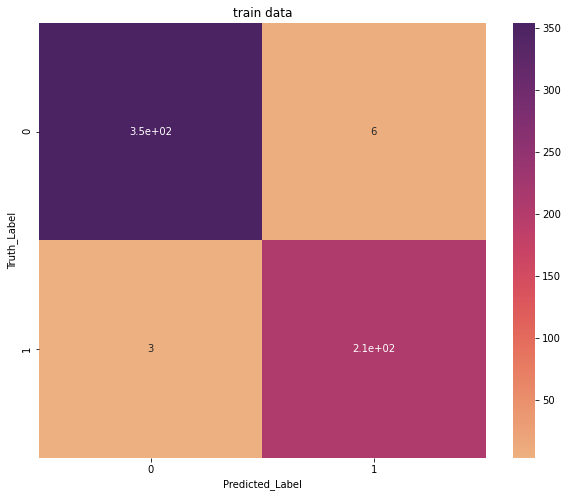

In [26]:
confuse_plot(conf, "train data")

Part 2 of the model building and deployment

In [ ]:
# split the data
X_train, X_test, Y_train, Y_test = train_test_split(feature, new_label,  test_size=0.20, random_state= 123)

# standardize 
new_scaler = StandardScaler().fit(X_train)
new_x_train = standardize_features(new_scaler, X_train)
new_x = new_x_train.T
new_y = Y_train.T

In [ ]:
costs, ann_parameters = Build_Multi_ANN(new_x, new_y, ACTIVATION_FUNCTION, 
                                       ANN_SIZE, COST_FUNCTION, ANN_LAYER, LEARNING_RATE, EPOCHS)

In [ ]:
Y_pred_train = model_prediction(new_x, ann_parameters, ACTIVATION_FUNCTION, ANN_SIZE)
Y_pred1_score = get_accuracy_score(Y_pred_train, new_y)
print(Y_pred1_score)

new_x_test = standardize_features(new_scaler, X_test)
new_x2 = new_x_test.T
new_y2 = Y_test.T

In [ ]:
Y_pred_test = model_prediction(new_x2, ann_parameters, ACTIVATION_FUNCTION, ANN_SIZE)
Y_pred2_score = get_accuracy_score(Y_pred_test, new_y2)
print(Y_pred2_score)


In [ ]:
conf = confusion_matrix(Y_pred_test, new_y2)

In [ ]:
print(conf)